x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0.

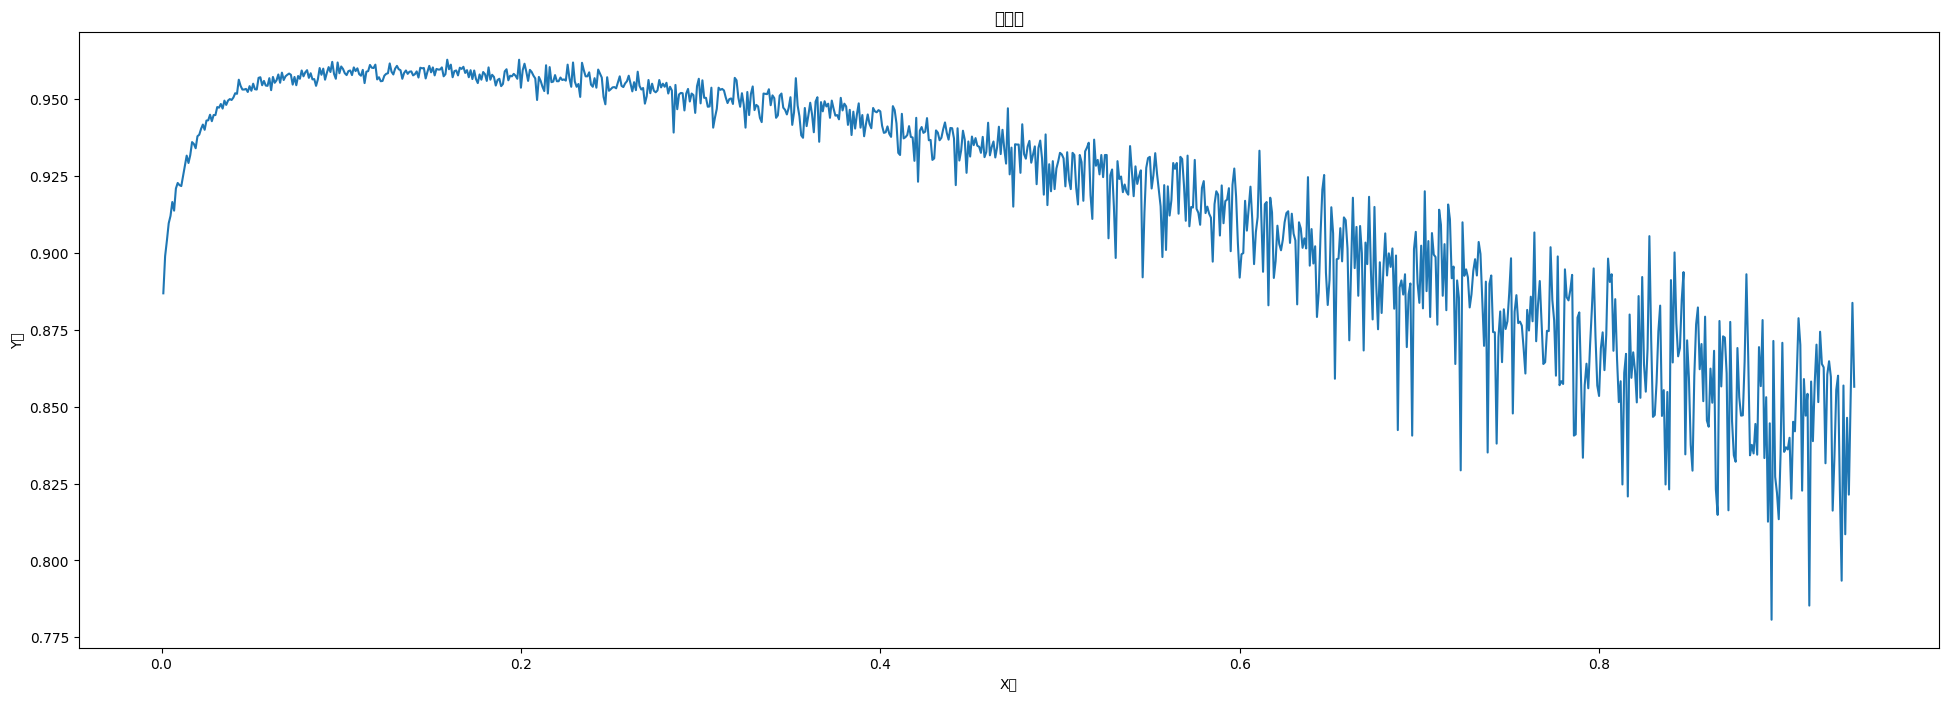

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_dataset/pjreddie/mnist_test.csv'

In [4]:
# 计算模块
import numpy as np
# 特殊公式模块
import scipy.special as sp
import matplotlib.pyplot as plt
from IPython.display import clear_output

def draw():
    plt.subplots(figsize=(24, 8))
    plt.plot(x, y)
    plt.xlabel('X轴')
    plt.ylabel('Y轴')
    plt.title('折线图')
    plt.show()

# 随机权重矩阵
def random_weight_matrix(len1, len2):
    # 正态分布
    return np.random.normal(0.0, pow(len1, -0.5), (len1, len2))

# 转为矩阵
def convert_matrix(list):
    return np.array(list, ndmin=2).T

# 计算操作
def output_calc(weight, input, activation_fn):
    return activation_fn(np.dot(weight, input))


class neuralNetwork:
    # 初始化神经网络
    def __init__(self, nodes_info, learning_grate):
        # 输入层、隐藏层、输出层
        self.nodes_input = nodes_info['input']
        self.nodes_hide = nodes_info['hide']
        self.nodes_output = nodes_info['output']

        # 学习率
        self.lr = learning_grate

        # 输入层与隐藏层之间的权重矩阵
        self.w_ih = random_weight_matrix(self.nodes_hide, self.nodes_input)
        # 隐藏层与输出层之间的权重矩阵
        self.w_ho = random_weight_matrix(self.nodes_output, self.nodes_hide)

		# 激活函数（sigmoid）
        self.activation_fn = lambda x: sp.expit(x)
        
        # 空哈希值
        self.hash_val = ''

    # 训练神经网络
    def train(self, input_list, target_list):
        input = convert_matrix(input_list)
        target = convert_matrix(target_list)

        # input = convert_matrix(input_list)
        self.calc_input(input_list)

        # 算出误差（目标 - 结果）
        # 输出层误差
        output_error = target - self.final_output
        # 隐藏层误差
        hidden_error = np.dot(self.w_ho.T, output_error)

        # 通过误差修改
        self.w_ho += self.lr * np.dot((output_error * self.final_output * (1 - self.final_output)), np.transpose(self.hidden_output))
        self.w_ih += self.lr * np.dot((hidden_error * self.hidden_output * (1 - self.hidden_output)), np.transpose(input))

    # 查询神经网络
    def query(self, input_list):
        # 将输入数组转为矩阵
        # input = convert_matrix(input_list)
        self.calc_input(input_list)

        return self.final_output
    
    # 定义计算隐藏层、输出层值函数
    # 通过内置的哈希校验判断输入是否相同，如果相同，则不计算
    def calc_input(self, input_list):
        hash_val = hash(''.join(str(i) for i in input_list))
        if self.hash_val != hash_val:
            self.hash_val = hash_val
            self.hidden_output = output_calc(self.w_ih, convert_matrix(input_list), self.activation_fn)
            self.final_output = output_calc(self.w_ho, self.hidden_output, self.activation_fn)


    x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106]
    y = [0.8869, 0.899, 0.9041, 0.9097, 0.9121, 0.9166, 0.9138, 0.921, 0.9228, 0.9221, 0.9218, 0.9251, 0.9283, 0.9317, 0.9293, 0.9319, 0.9361, 0.9355, 0.9341, 0.938, 0.9385, 0.9404, 0.9418, 0.9401, 0.9431, 0.9432, 0.945, 0.9429, 0.9449, 0.9449, 0.9475, 0.9473, 0.9485, 0.947, 0.9496, 0.9482, 0.9496, 0.9501, 0.9498, 0.9506, 0.952, 0.9518, 0.9564, 0.9544, 0.9532, 0.9532, 0.9534, 0.9524, 0.9543, 0.9528, 0.9551, 0.9533, 0.9532, 0.957, 0.9572, 0.9546, 0.956, 0.9545, 0.9544, 0.9569, 0.953, 0.9573, 0.9554, 0.9562, 0.9581, 0.9554, 0.9587, 0.9563, 0.9575, 0.958, 0.9584, 0.958, 0.9548, 0.9573, 0.9546, 0.9576, 0.9567, 0.9594, 0.9575, 0.9588, 0.9595, 0.957, 0.9585, 0.9565, 0.9566, 0.9544, 0.9565, 0.9602, 0.958, 0.96, 0.9564, 0.9586, 0.9605, 0.9589, 0.9622, 0.9583, 0.9567, 0.962, 0.9585, 0.9607, 0.9599, 0.9585, 0.9579, 0.9592, 0.9594, 0.9579]

def get_score(learning_grate):
    # 节点信息
    neural_node_info = {
        'input': 784,
        'hide': 200,
        'output': 10
    }
    # 学习率
    # learning_grate = 0.3

    # 实例化一个神经网络对象
    example = neuralNetwork(neural_node_info, learning_grate)
    # 以列表载入mnist训练数据集文件内容
    with open('mnist_dataset/pjreddie/mnist_train.csv', 'r') as training_data_file:
    # with open('mnist_dataset/mini/mnist_train_100.csv', 'r') as training_data_file:
        training_data_list = training_data_file.readlines()

    # 遍历训练数据集中的所有记录
    for record in training_data_list:
        # 用逗号分隔记录
        all_values = record.split(',')
        # 转换输入
        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99 + 0.01)
        # 设定目标值
        targets = np.zeros(neural_node_info['output']) + 0.01
        # all_values[0] 就是此记录的目标
        targets[int(all_values[0])] = 0.99
        
        example.train(inputs, targets)

    # 以数组存储测试数据
    # with open('mnist_dataset/mini/mnist_test_10.csv') as test_data_file:
    with open('mnist_dataset/pjreddie/mnist_test.csv') as test_data_file:
        test_data_list = test_data_file.readlines()

    # 添加计分板
    scorecard = []

    for record in test_data_list:
        all_values = record.split(',')

        correct_label = int(all_values[0])
        # print(f'目标值:{correct_label}')

        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01

        # 学习成果
        output = example.query(inputs)

        # 得出最大值
        label = np.argmax(output)
        # print(f'实际值: {label}')

        # 如果成功算出则加1，反之加0
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)

    # print(scorecard)

    scorecard_arr = np.asarray(scorecard)
    score = scorecard_arr.sum() / scorecard_arr.size
    # print(f'得分: {score}')
    y.append(score)
    x.append(learning_grate)
    clear_output()
    print(f'x = {x}\n y = {y}')
    draw()
    
# from decimal import Decimal
step = 0.107
for i in range(883):
    get_score(round(step, 3))
    step += 0.001
# print(x, y)